# Exercise 1a
## 1 Monte-Carlo Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt # plotting



## 1.1 Data Creation and Visualization (7 points)


Step 01: Generate CDF \
F(x)[p(X = x|Y = 0)] = 2x - x^2\
F(x)[p(X = x|Y = 1)] = x^2

Step 02: Find inverse CDF \
F'(x)[p(X = x|Y = 0)] = 1 - sqrt(1-y)   * 0<x<1 \
F'(x)[p(X = x|Y = 1)] = sqrt(y)

In [2]:
# Generate CDF
# F(x)[p(X = x|Y = 0)] = 2x - x^2
# F(x)[p(X = x|Y = 1)] = x^2
# Find inverse CDF
# F'(x)[p(X = x|Y = 0)] = 1 - sqrt(1-y)   * 0<x<1
# F'(x)[p(X = x|Y = 1)] = sqrt(y)

def create_data(N):
    # Generate Y 
    Y = np.random.choice([0,1], size = N, p = [0.5,0.5])   # shape:(N,)
    # Initialize X 
    X = np.array([])    # shape:(,)
    for y in Y:
        # Generate uniformly distributed sample for inverse CDF method
        u = np.random.uniform(0, 1)
        # Generate X using inverse CDF method
        if y == 0 : 
            X = np.append( X, 1 - np.sqrt(1-u) )
        else :
            X = np.append( X, np.sqrt(u) )
    return X,Y


In [3]:
# Return X-values, Y-labels for N=10000 instances 

N = 10000
X , Y = create_data(N)


(array([0.97210296, 1.05411165, 0.98110391, 0.95710137, 0.94910052,
        0.99110497, 1.02110815, 1.05411165, 1.03610974, 0.98510434]),
 array([1.86172938e-05, 1.00008026e-01, 1.99997434e-01, 2.99986843e-01,
        3.99976251e-01, 4.99965660e-01, 5.99955068e-01, 6.99944477e-01,
        7.99933885e-01, 8.99923294e-01, 9.99912702e-01]),
 <BarContainer object of 10 artists>)

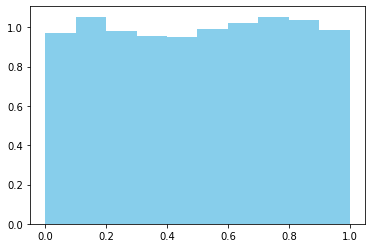

In [4]:
# Check the distribution with matplotlib (X)

plt.hist(X,density=True,color = "skyblue")


(array([ 63., 151., 239., 313., 457., 543., 684., 816., 854., 928.]),
 array([0.01844088, 0.11658806, 0.21473524, 0.31288243, 0.41102961,
        0.50917679, 0.60732397, 0.70547116, 0.80361834, 0.90176552,
        0.9999127 ]),
 <BarContainer object of 10 artists>)

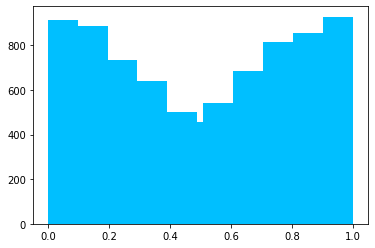

In [5]:
# Check the distribution with matplotlib (likelihood)

plt.hist(X[np.where(Y == 0)], color = "deepskyblue")
plt.hist(X[np.where(Y == 1)], color = "deepskyblue")




## 1.2 Classification by Thresholding (5 points)



In [7]:
def RuleClassifier(x, xt, rule):
    y = []
    if rule == "A":
        for xi in x:
            if xi < xt:
                y.append(0)
            else:
                y.append(1)
    elif rule == "B":
        for xi in x:
            if xi < xt:
                y.append(1)
            else:
                y.append(0)
    elif rule == "C":
        for xi in x:
            yn = np.random.choice(2, size = 1).tolist()[0]
            y.append(yn)
    elif rule == "D":
        for xi in x:
            y.append(1)
    return y


In [8]:
def calError(xt) : 
    probErrorA = 1/4 + (xt - 1/2) ** 2
    probErrorB = 1 - probErrorA
    return print("Rule A --> Error =",probErrorA, ";", "Rule B --> Error =", probErrorB)


In [9]:
def calRealError(xt, M, n, model, rule):
    MeanA, DevA, MeanB, DevB  = [], [], [], []
    for m in M:
        errorA, errorB = [], []
        for _ in range(n):
            X , Y = create_data(m)
            yA = model(X, xt, rule=rule[0])
            errorA.append( (m - np.sum(yA == Y)) / m )
            yB = model(X, xt, rule=rule[1])
            errorB.append( (m - np.sum(yB == Y)) / m )
        meanErrorA, devErrorA, meanErrorB, devErrorB = np.mean((errorA)),np.std(errorA),np.mean(errorB),np.std(errorB)
        MeanA.append(meanErrorA)
        DevA.append(devErrorA)
        MeanB.append(meanErrorB)
        DevB.append(devErrorB)
        print("Rule",rule[0],"( xt = ",xt,")--> M =",m," : mean =",round(meanErrorA,2)," ; ","sd =",round(devErrorA,3))
        print("Rule",rule[1],"( xt = ",xt,")--> M =",m," : mean =",round(meanErrorB,2)," ; ","sd =",round(devErrorB,3))
    return MeanA, DevA, MeanB, DevB


In [10]:
# Calculate the 'true' error rate using given rate formula

calError(xt=0.2)
calError(xt=0.5)
calError(xt=0.6)


Rule A --> Error = 0.33999999999999997 ; Rule B --> Error = 0.66
Rule A --> Error = 0.25 ; Rule B --> Error = 0.75
Rule A --> Error = 0.26 ; Rule B --> Error = 0.74


In [11]:
# Calculate the 'real' error rate by repeating 10 test datasets of the same size M = [10,100,1000,1000]

M = [10,100,1000,10000]


In [12]:
# xt = 0.2

MeanA1, DevA1, MeanB1, DevB1 = calRealError(xt=0.2, M=M, n=10, model=RuleClassifier,rule=["A","B"])


Rule A ( xt =  0.2 )--> M = 10  : mean = 0.3  ;  sd = 0.118
Rule B ( xt =  0.2 )--> M = 10  : mean = 0.7  ;  sd = 0.118
Rule A ( xt =  0.2 )--> M = 100  : mean = 0.32  ;  sd = 0.046
Rule B ( xt =  0.2 )--> M = 100  : mean = 0.68  ;  sd = 0.046
Rule A ( xt =  0.2 )--> M = 1000  : mean = 0.34  ;  sd = 0.012
Rule B ( xt =  0.2 )--> M = 1000  : mean = 0.66  ;  sd = 0.012
Rule A ( xt =  0.2 )--> M = 10000  : mean = 0.34  ;  sd = 0.004
Rule B ( xt =  0.2 )--> M = 10000  : mean = 0.66  ;  sd = 0.004


In [13]:
# xt = 0.5

MeanA2, DevA2, MeanB2, DevB2 = calRealError(xt=0.5, M=M, n=10, model=RuleClassifier,rule=["A","B"])


Rule A ( xt =  0.5 )--> M = 10  : mean = 0.16  ;  sd = 0.12
Rule B ( xt =  0.5 )--> M = 10  : mean = 0.84  ;  sd = 0.12
Rule A ( xt =  0.5 )--> M = 100  : mean = 0.25  ;  sd = 0.025
Rule B ( xt =  0.5 )--> M = 100  : mean = 0.75  ;  sd = 0.025
Rule A ( xt =  0.5 )--> M = 1000  : mean = 0.25  ;  sd = 0.012
Rule B ( xt =  0.5 )--> M = 1000  : mean = 0.75  ;  sd = 0.012
Rule A ( xt =  0.5 )--> M = 10000  : mean = 0.25  ;  sd = 0.004
Rule B ( xt =  0.5 )--> M = 10000  : mean = 0.75  ;  sd = 0.004


In [14]:
# xt = 0.6

MeanA3, DevA3, MeanB3, DevB3 = calRealError(xt=0.6, M=M, n=10, model=RuleClassifier,rule=["A","B"])


Rule A ( xt =  0.6 )--> M = 10  : mean = 0.32  ;  sd = 0.209
Rule B ( xt =  0.6 )--> M = 10  : mean = 0.68  ;  sd = 0.209
Rule A ( xt =  0.6 )--> M = 100  : mean = 0.28  ;  sd = 0.021
Rule B ( xt =  0.6 )--> M = 100  : mean = 0.72  ;  sd = 0.021
Rule A ( xt =  0.6 )--> M = 1000  : mean = 0.25  ;  sd = 0.016
Rule B ( xt =  0.6 )--> M = 1000  : mean = 0.75  ;  sd = 0.016
Rule A ( xt =  0.6 )--> M = 10000  : mean = 0.26  ;  sd = 0.005
Rule B ( xt =  0.6 )--> M = 10000  : mean = 0.74  ;  sd = 0.005


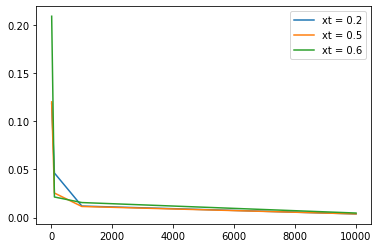

In [15]:
# Plot the changes of deviation with increasing M = [10,100,1000,1000]

plt.plot(M,DevA1, label = "xt = 0.2")
plt.plot(M,DevA2, label = "xt = 0.5")
plt.plot(M,DevA3, label = "xt = 0.6")
plt.legend()
plt.show()




## 1.3 Baseline Classifiers (2 points)


In [17]:
# Calculate the 'real' error rate by repeating 10 test datasets of the same size M = [10,100,1000,1000]

M = [10,100,1000,10000]
MeanC, DevC, MeanD, DevD = calRealError(xt=None,M=M, n=10, model=RuleClassifier,rule=["C","D"])


Rule C ( xt =  None )--> M = 10  : mean = 0.49  ;  sd = 0.176
Rule D ( xt =  None )--> M = 10  : mean = 0.47  ;  sd = 0.149
Rule C ( xt =  None )--> M = 100  : mean = 0.53  ;  sd = 0.042
Rule D ( xt =  None )--> M = 100  : mean = 0.51  ;  sd = 0.044
Rule C ( xt =  None )--> M = 1000  : mean = 0.5  ;  sd = 0.015
Rule D ( xt =  None )--> M = 1000  : mean = 0.51  ;  sd = 0.015
Rule C ( xt =  None )--> M = 10000  : mean = 0.5  ;  sd = 0.005
Rule D ( xt =  None )--> M = 10000  : mean = 0.5  ;  sd = 0.005


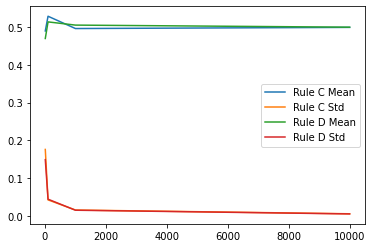

In [18]:
# Plot the changes of deviation with increasing M = [10,100,1000,1000]

plt.plot(M,MeanC, label = "Rule C Mean")
plt.plot(M,DevC, label = "Rule C Std")
plt.plot(M,MeanD, label = "Rule D Mean")
plt.plot(M,DevD, label = "Rule D Std")
plt.legend()
plt.show()




## 1.4 Nearest Neighbor Classification (6 points)



In [20]:
def create_NN_data(N):
    # Generate Y and ensure at least one instance of either class
    Y = np.random.choice([0,1], size = N, p = [0.5,0.5])   # shape:(N,)
    while len(set(Y)) == 1:
        Y = np.random.choice([0,1], size = N, p = [0.5,0.5])   # shape:(N,)
    # Initialize X 
    X = np.array([])   
    for y in Y:
        # Generate uniformly distributed sample for inverse CDF method
        u = np.random.uniform(0, 1)
        # Generate X using inverse CDF method
        if y == 0 : 
            X = np.append( X, 1 - np.sqrt(1-u) )
        else :
            X = np.append( X, np.sqrt(u) )
    return X,Y


In [21]:
def NNclassifier(x_train, y_train, x_test):
    y_test = []
    for xi in x_test:
        y = y_train[ (np.abs(x_train - xi)).argmin() ]
        y_test = np.append(y_test, y)
    return y_test


In [22]:
def calNNError(N_train, N_test, n, model):
    MeanA , DevA = [], []
    for m in N_train:
        X_test,Y_test = create_NN_data(N_test)
        errorA = []
        for _ in range(n):
            X, Y = create_NN_data(m)
            y_test = model(x_train=X, y_train=Y, x_test=X_test)
            errorA.append( (N_test - np.sum(y_test == Y_test)) / N_test )
        meanErrorA, devErrorA = np.mean((errorA)),np.std(errorA)
        MeanA.append(meanErrorA)
        DevA.append(devErrorA)
        print("Nearest Neighbor Classifier--> Trainset N =",m," : mean =",round(meanErrorA,2)," ; ","sd =",round(devErrorA,3))
    return MeanA, DevA


In [23]:
# Set train dataset size N_train = [2,100]
# Set test dataset size suffciently large N_test = 1000

N_train = [2,100]
N_test = 1000


In [24]:
# Repeat each experiment (N_train = [2,100]) with 100 different train set

n = 100
Mean, Dev = calNNError(N_train=N_train, N_test=N_test, n=100, model=NNclassifier)


Nearest Neighbor Classifier--> Trainset N = 2  : mean = 0.32  ;  sd = 0.165
Nearest Neighbor Classifier--> Trainset N = 100  : mean = 0.35  ;  sd = 0.025
